In [1]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np

In [3]:
dataset = keras.datasets.fashion_mnist

In [6]:
(train_images,train_labels),(test_images,test_labels)=dataset.load_data()

In [7]:
train_images.shape

(60000, 28, 28)

In [16]:
import matplotlib.pyplot as plt
import time

In [20]:
classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

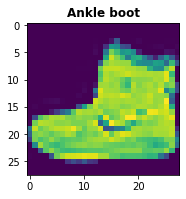

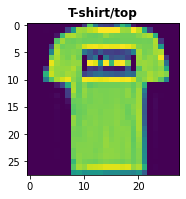

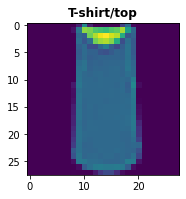

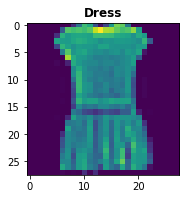

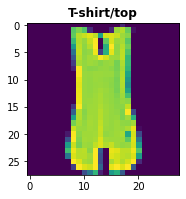

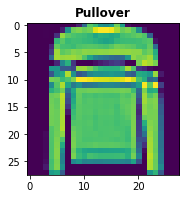

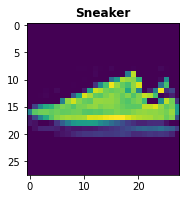

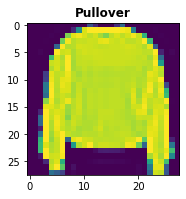

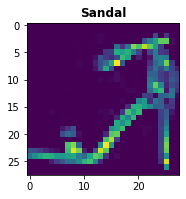

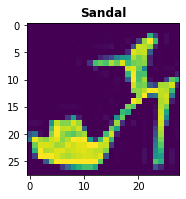

In [25]:
for i in range(10):
    plt.figure(figsize=(2.8, 2.8))
    plt.title(classes[train_labels[i]],fontweight = 'bold')
    plt.imshow(train_images[i])

In [26]:
train_images = train_images/255.0
test_images = test_images/255.0

In [55]:
test_images.shape

(10000, 28, 28, 1)

In [28]:
train_images[0].shape

(28, 28)

In [29]:
train_images = train_images.reshape(len(train_images),28,28,1)
test_images = test_images.reshape(len(test_images),28,28,1)

In [31]:
train_images[0].shape

(28, 28, 1)

In [40]:
def build_model(hp):
    model=keras.Sequential([ 
        keras.layers.Conv2D(
            filters = hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
            kernel_size = hp.Choice('conv_1_kernel', values = [3,5]),
            activation = 'relu',
            input_shape = (28,28,1)
        ),
        keras.layers.Conv2D(
            filters = hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
            kernel_size = hp.Choice('conv_1_kernel', values = [3,5]),
            activation = 'relu',
        ),
        keras.layers.Flatten(),
        keras.layers.Dense(
            units = hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
            activation = 'relu'
        ),
        keras.layers.Dense(10,activation='softmax')
    ])
    
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2,1e-3])),
                 loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])
    return model

In [41]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [42]:
tuner_search = RandomSearch(build_model, objective = 'val_accuracy', max_trials = 5, directory='output', project_name = 'MNIST_FASHION')

In [43]:
tuner_search.search(train_images, train_labels, epochs=3, validation_split=0.1)

Trial 5 Complete [00h 10m 24s]
val_accuracy: 0.9081666469573975

Best val_accuracy So Far: 0.9081666469573975
Total elapsed time: 00h 52m 38s
INFO:tensorflow:Oracle triggered exit


In [45]:
model = tuner_search.get_best_models(num_models=1)[0]

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 64)        1664      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 48)        76848     
_________________________________________________________________
flatten (Flatten)            (None, 19200)             0         
_________________________________________________________________
dense (Dense)                (None, 96)                1843296   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                970       
Total params: 1,922,778
Trainable params: 1,922,778
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.fit(train_images,train_labels,epochs=10,validation_split=0.1,initial_epoch=3)

Epoch 4/10
1688/1688 [==============================] - 227s 134ms/step - loss: 0.1713 - accuracy: 0.9366 - val_loss: 0.2648 - val_accuracy: 0.9085
Epoch 5/10
1688/1688 [==============================] - 209s 124ms/step - loss: 0.1342 - accuracy: 0.9497 - val_loss: 0.2834 - val_accuracy: 0.9078
Epoch 6/10
1688/1688 [==============================] - 210s 125ms/step - loss: 0.1012 - accuracy: 0.9623 - val_loss: 0.3147 - val_accuracy: 0.9075
Epoch 7/10
1688/1688 [==============================] - 229s 136ms/step - loss: 0.0800 - accuracy: 0.9702 - val_loss: 0.3414 - val_accuracy: 0.9133
Epoch 8/10
1688/1688 [==============================] - 220s 131ms/step - loss: 0.0623 - accuracy: 0.9755 - val_loss: 0.3924 - val_accuracy: 0.9113
Epoch 9/10
1688/1688 [==============================] - 201s 119ms/step - loss: 0.0481 - accuracy: 0.9814 - val_loss: 0.4351 - val_accuracy: 0.9105
Epoch 10/10
1688/1688 [==============================] - 201s 119ms/step - loss: 0.0444 - accuracy: 0.9845 - val

In [60]:
test_loss, test_accuracy = model.evaluate(test_images,test_labels) 

313/313 [==============================] - 10s 32ms/step - loss: 0.4732 - accuracy: 0.9038


In [61]:
predictions = model.predict(test_images)

In [62]:
test_images.shape

(10000, 28, 28, 1)

In [63]:
predictions.shape

(10000, 10)

In [69]:
#a prediction is an array of 10 numbers due to softmax function
predictions[0]
expected=[]
for i in predictions:
    expected.append(tf.math.argmax(i))

In [71]:
expected = np.array(expected)

In [72]:
expected.shape

(10000,)

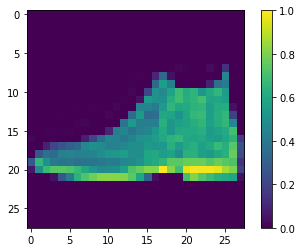

Ankle boot Ankle boot


In [74]:
plt.imshow(test_images[0])
plt.colorbar()
plt.show()
print(classes[test_labels[0]],classes[expected[0]])

In [77]:
def prediction(i,test_images,classes,expected):
    plt.title("Actual : "+classes[test_labels[i]]+"       Prediction : "+classes[expected[i]])
    plt.imshow(test_images[i])
    plt.colorbar()
    plt.show()

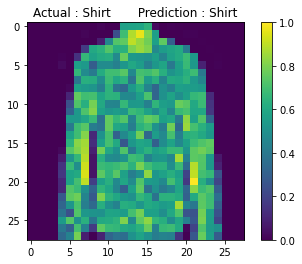

In [82]:
prediction(101,test_images,classes,expected)